In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
transactions= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)

In [3]:
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',header=1)

In [4]:
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',header=1)

In [5]:
#NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',header=1)

In [6]:
CustomerDemographic_ = CustomerDemographic.copy()
transactions_ = transactions.copy()
CustomerAddress_ = CustomerAddress.copy()

In [7]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [8]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [9]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


## Data Quality Assessment for Customer Demographics

In [10]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [11]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [12]:
CustomerDemographic.duplicated().sum()

0

In [13]:
CustomerDemographic.isnull().sum()/len(CustomerDemographic) * 100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [14]:
CustomerDemographic.customer_id.nunique()

4000

In [15]:
CustomerAddress_.customer_id.nunique()

3999

In [16]:
transactions.customer_id.nunique()

3494

In [17]:
#Inconsistencies in the gender 
CustomerDemographic.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

## Correct inconsistencies in Gender 

In [18]:
CustomerDemographic_.gender.replace('M','Male', inplace=True)

In [19]:
CustomerDemographic_.gender.replace('F','Female', inplace=True)

In [20]:
CustomerDemographic_.gender.replace('Femal','Female', inplace=True)

In [21]:
CustomerDemographic_.gender.replace('U','Others', inplace=True)

In [22]:
#CustomerDemographic_.loc[CustomerDemographic_['gender']=='F'  ] ='Female'

In [23]:
#CustomerDemographic_.loc[CustomerDemographic_['gender']=='Femal'  ] ='Female'

In [24]:
#CustomerDemographic_.loc[CustomerDemographic_['gender']=='U'  ] ='Others'

In [25]:
#New data after correction was made
CustomerDemographic_.gender.value_counts()

Female    2039
Male      1873
Others      88
Name: gender, dtype: int64

In [26]:
CustomerDemographic_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [27]:
#CustomerDemographic['DOB'] = CustomerDemographic['DOB'].astype('float')

In [28]:
#CustomerDemographic['DOB'] = CustomerDemographic['gender'].astype

In [29]:
#CustomerDemographic_.loc[CustomerDemographic_['DOB']=='Female']

In [30]:
date_of_birth = pd.to_datetime(CustomerDemographic_['DOB'])
#CustomerDemographic.info()

In [31]:
#date_of_birth = pd.to_datetime(CustomerDemographic['DOB'])

year = date_of_birth.dt.year

In [32]:
age = 2020-year

In [33]:
age[age>100]

33    177.0
Name: DOB, dtype: float64

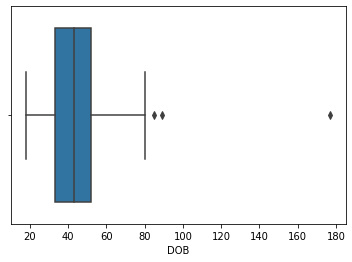

In [34]:
sns.boxplot(age)
#we see one outlier here

In [35]:
age.max(), age.min() #max age is 177 which is not possible in this age

(177.0, 18.0)

In [36]:
#replace outlier with the mean
age.replace(177, age.mean(), inplace=True)

In [37]:
#CustomerDemographic['job_title'].value_counts()

In [38]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [39]:
def value_counter(x,col):
    return x[col].value_counts()

In [40]:
value_counter(CustomerDemographic,'wealth_segment')

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [41]:
value_counter(CustomerDemographic, 'deceased_indicator')

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [42]:
#value_counter(CustomerDemographic,'default')

In [43]:
value_counter(CustomerDemographic,'owns_car')

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [44]:
#value_counter(CustomerDemographic,'tenure')

In [45]:
CustomerDemographic_.drop(columns=['default'], inplace=True)

In [46]:
CustomerDemographic_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 375.1+ KB


## Data Quality Assessment for Transactions

In [47]:
transactions_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [48]:
transactions_.duplicated().sum()

0

In [49]:
missing =transactions.isna()

In [50]:
len(transactions)

20000

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64


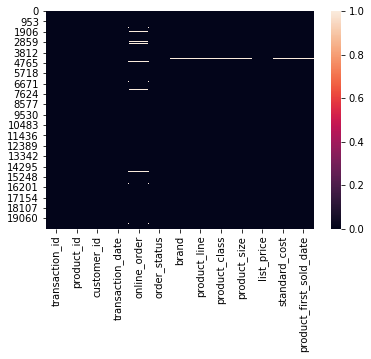

In [51]:
print(transactions.isna().sum()/len(transactions)*100)
sns.heatmap(missing)

In [52]:
transactions.customer_id.nunique()

3494

In [53]:
transactions_ = transactions.dropna()

In [54]:
value_counter(transactions_,'online_order')

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [55]:
value_counter(transactions_,'order_status')

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [56]:
value_counter(transactions_,'brand')

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [57]:
value_counter(transactions_,'product_line')

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [58]:
value_counter(transactions_,'product_class')

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [59]:
value_counter(transactions_,'product_size')

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [60]:
#value_counter(transactions_,'list_price')

In [61]:
transactions_.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## ## Data Quality Assessment for Customer Address

In [62]:
CustomerAddress_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [63]:
CustomerAddress_.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [64]:
CustomerAddress_.apply(lambda x: x.nunique())

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [65]:
CustomerAddress_.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [75]:
df = pd.merge(CustomerDemographic_, CustomerAddress_, how='left', on='customer_id' ,)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
address                                3996 non-null object
postcode                               3996 non-null float64
state                                  3996 n

In [144]:
#df1 = pd.merge(df, transactions_, how='inner', on='customer_id',)

In [71]:
new_transactions = transactions_.drop_duplicates(subset=['customer_id'])

In [72]:
new_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 18734
Data columns (total 13 columns):
transaction_id             3492 non-null int64
product_id                 3492 non-null int64
customer_id                3492 non-null int64
transaction_date           3492 non-null datetime64[ns]
online_order               3492 non-null float64
order_status               3492 non-null object
brand                      3492 non-null object
product_line               3492 non-null object
product_class              3492 non-null object
product_size               3492 non-null object
list_price                 3492 non-null float64
standard_cost              3492 non-null float64
product_first_sold_date    3492 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 381.9+ KB


In [77]:
df1 = pd.merge(df, new_transactions, how='left', on='customer_id',)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 29 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
address                                3996 non-null object
postcode                               3996 non-null float64
state                                  3996 n